# Step 2: Prepare the Environment and Data
Let's start by setting up our noisy dataset to demonstrate how bagging handles messy data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Set random seed for reproducibility
np.random.seed(42)


# Generate synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.5,  # Controls the amount of noise
    random_state=42
)

# Step 3: Implementing Bagging
Create our ensemble of trees, each trained on different samples of our data.

In [4]:
# Initialize and train the bagging classifier
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X, y)

# #added during screencast
# Print information about our ensemble
print(f"Number of estimators: {len(bagging_clf.estimators_)}")
print(f"Sample size for each estimator: {bagging_clf.max_samples}")


Number of estimators: 50
Sample size for each estimator: 1.0


# Step 4: Visualizing Bagging and Decision Boundaries
Compare how a single tree and bagging ensemble make decisions differently.

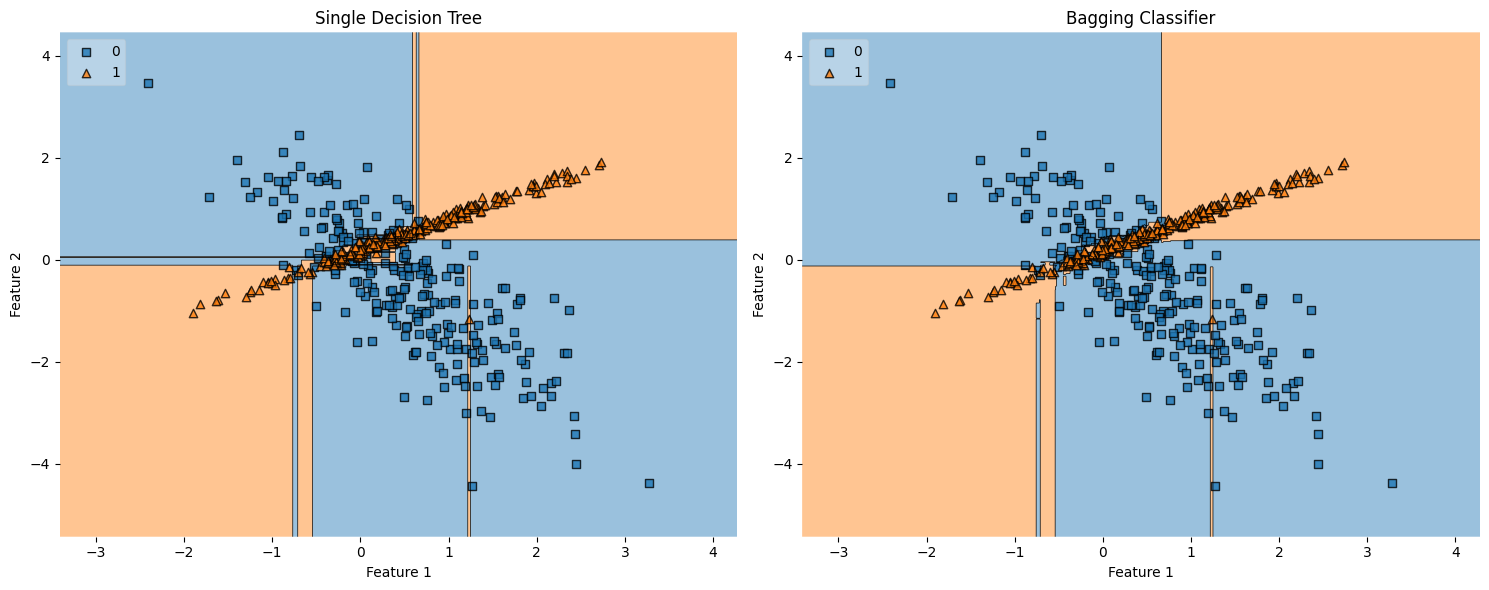

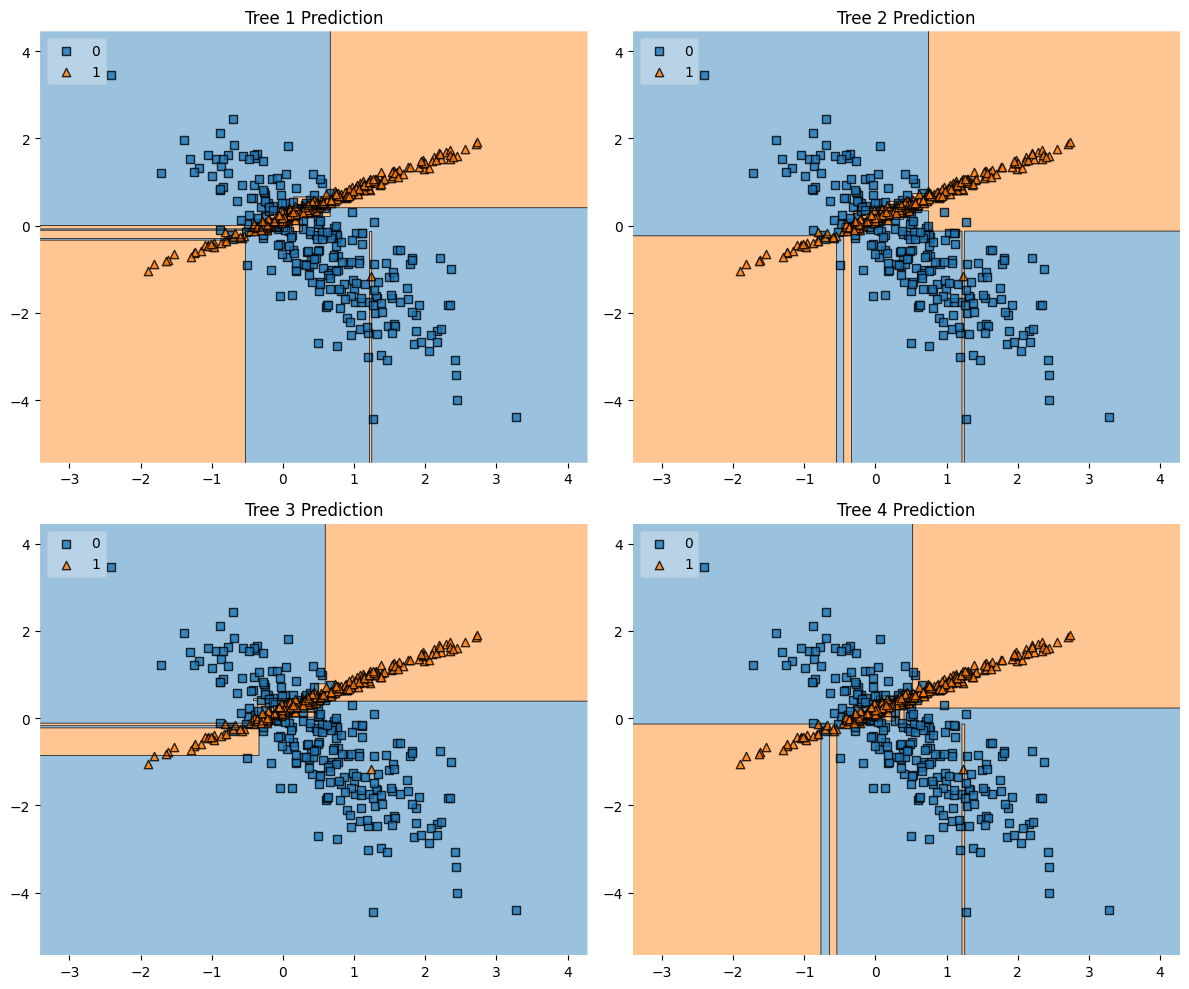

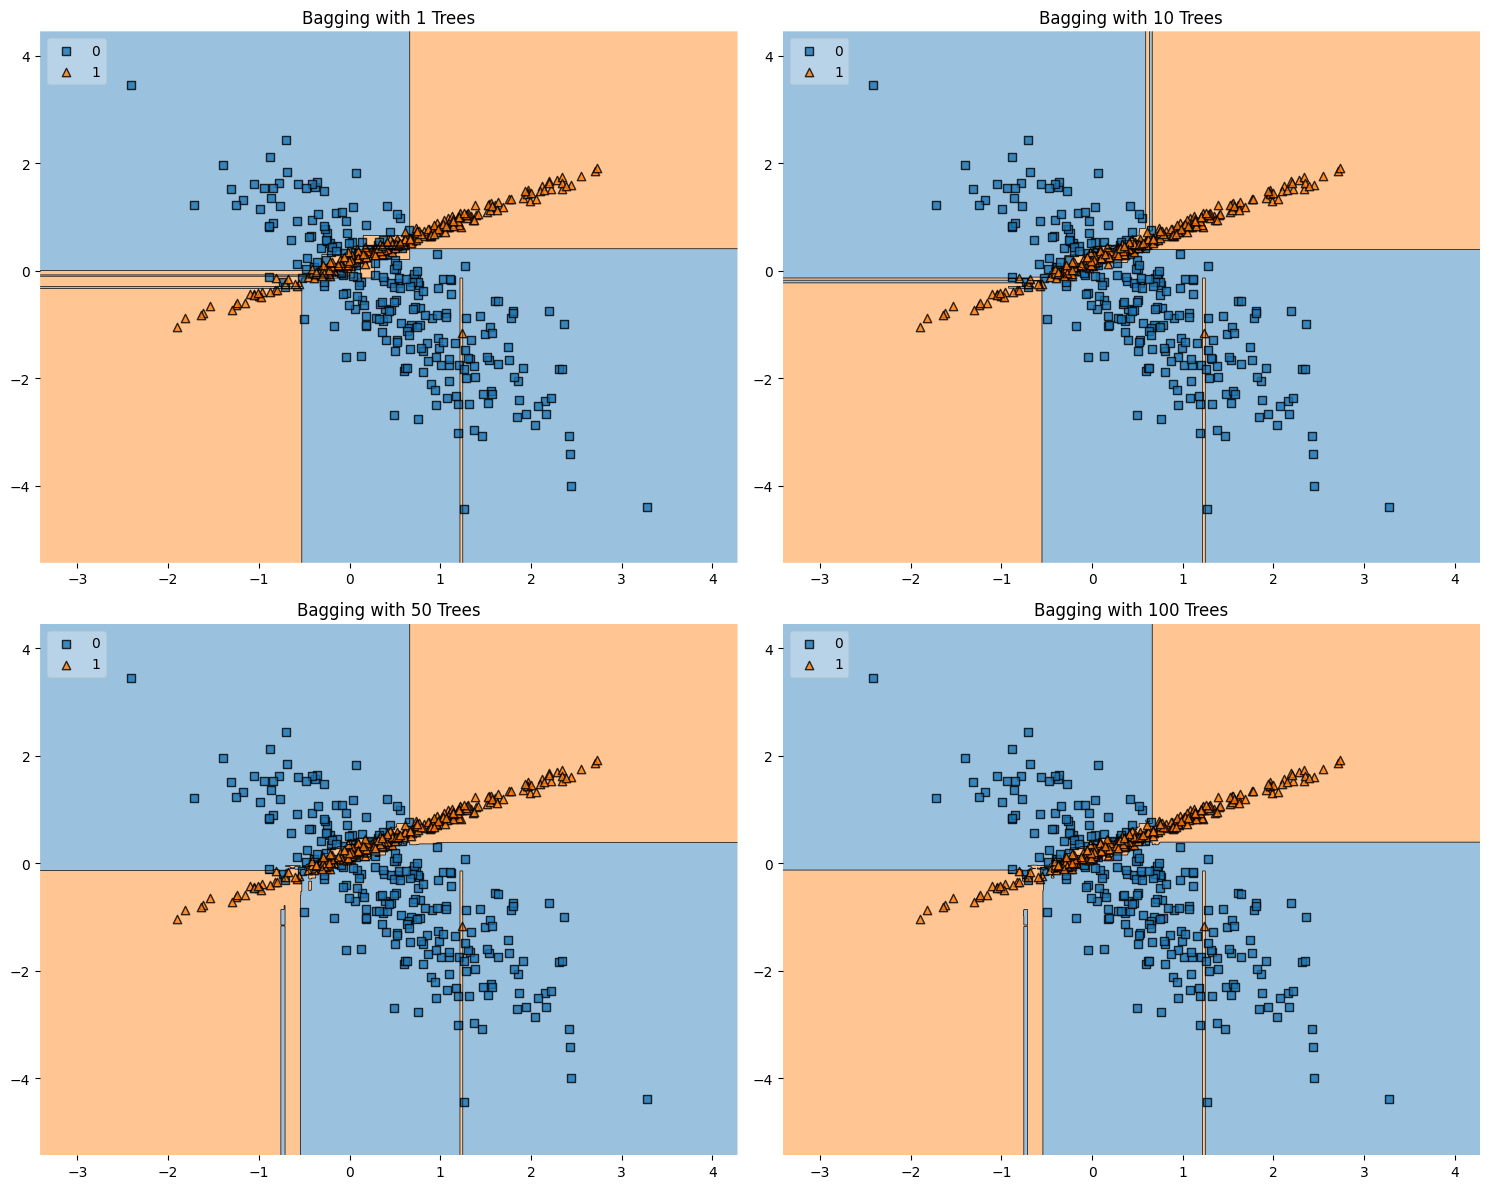

In [6]:
from mlxtend.plotting import plot_decision_regions

# Create comparison plot
plt.figure(figsize=(15, 6))

# Single decision tree plot
plt.subplot(1, 2, 1)
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X, y)
plot_decision_regions(X, y, clf=single_tree, legend=2)
plt.title('Single Decision Tree')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Bagging classifier plot
plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=bagging_clf, legend=2)
plt.title('Bagging Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# #added during screencast
# Additional visualization to show individual tree predictions
# =====================================

def plot_individual_predictions(X, y, bagging_clf, n_trees=4):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    for idx, tree in enumerate(bagging_clf.estimators_[:n_trees]):
        plot_decision_regions(X, y, clf=tree, legend=2, ax=axes[idx])
        axes[idx].set_title(f'Tree {idx+1} Prediction')

    plt.tight_layout()
    plt.show()

# Plot predictions from first 4 trees
plot_individual_predictions(X, y, bagging_clf)

# #added during screencast
# Visualize how increasing the number of trees affects the model
# =====================================

n_estimators_range = [1, 10, 50, 100]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, n_est in enumerate(n_estimators_range):
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n_est,
        random_state=42
    )
    bag.fit(X, y)
    plot_decision_regions(X, y, clf=bag, legend=2, ax=axes[idx])
    axes[idx].set_title(f'Bagging with {n_est} Trees')

plt.tight_layout()
plt.show()